<a href="https://colab.research.google.com/github/nee1k/ab_testing/blob/main/Social_Media_A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Problem Statement

Facebook recently introduced a new bidding system called "average bidding" alongside the existing "maximum bidding" system. These bidding systems determine which ads get displayed to users based on how much advertisers are willing to pay.

With "maximum bidding," advertisers specify the maximum amount they are willing to pay for each impression. For example, an advertiser might say, "I'm willing to pay a maximum of $10 for each impression."

With "average bidding," advertisers specify an average amount they are willing to pay for impressions. For instance, they might say, "On average, I'm willing to pay $6 for each impression."


### Business Challenge: Unleashing the Power of Facebook Advertising

As a forward-thinking company poised to make waves in the realm of Facebook advertising, we're on a mission to unearth the most advantageous approach for our brand. Our burning questions:

1. **Which strategy will maximize clicks and driving purchases**?

2. **Is there a discernible and statistically significant difference between the two bidding options**?

Features:
- **Impression**: number of impressions per advertisement
- **Click**: number of clicks per advertisement
- **Purchase**: number of products purchased after a click
- **Earnings**: earnings after the purchase

## 2. Hypothesis Testing

### 2.1 Define Null and Alternate Hypotheses
In hypothesis testing, the null hypothesis (H0) is a statement that assumes there is no significant effect, relationship, or difference between the variables being studied. The alternative hypothesis (H1 or Ha) is a statement that contradicts the null hypothesis, suggesting the presence of a significant effect, relationship, or difference.

* **Null Hypothesis (H0):** There is no significant difference in the effectiveness (e.g., clicks, purchases) between 'average bidding' and 'maximum bidding.'
* **Alternative Hypothesis (H1):** There is a significant difference in the effectiveness (e.g., clicks, purchases) between 'average bidding' and 'maximum bidding.'

### 2.2 Set Significance Level (Alpha)
The significance level (alpha) is the probability of rejecting the null hypothesis when it is actually true (Type I error). It represents the risk we are willing to take of making a false positive conclusion.

Setting **Alpha (α)** as 0.05 (5%) - This means we are willing to accept a 5% chance of incorrectly concluding that there is a difference between the bidding strategies when there actually isn't.

### 2.3 Set Statistical Power (1 - Beta)
Statistical power (1 - beta) is the probability of correctly rejecting the null hypothesis when it is false (i.e., detecting a true effect). It represents the likelihood of finding a statistically significant difference if one truly exists.

Setting **Power (1 - β)** as 0.80 (80%) - This means we want an 80% chance of detecting a significant difference between the bidding strategies if a meaningful difference truly exists.

### 2.4 Set Minimum Detectable Effect (MDE)
The Minimum Detectable Effect (MDE) is the smallest effect size that we want to be able to detect with our hypothesis test. It represents the practical significance of the difference between the groups. Setting an MDE helps us to determine the required sample size to achieve the desired power.

Setting **MDE** as 500 - This means a $500 increase in earnings for the average bidding strategy compared to the maximum bidding strategy.


### 2.5 Calculating Sample Size

**General Definition:**
Calculating the sample size is crucial for ensuring the experiment has enough statistical power to detect a meaningful difference between groups. It involves determining the number of observations needed to achieve the desired significance level, power, and MDE.

**Formula:**
n = 2 * (Zα/2 + Zβ)^2 * (σ^2) / (MDE)^2

where:
* `n` is the sample size per group.
* `Zα/2` is the critical value for the significance level.
* `Zβ` is the critical value for the desired power.
* `σ^2` is the pooled variance.
* `MDE` is the minimum detectable effect.sub

**Example:**
Assuming:
* Significance level (alpha): 0.05
* Power (1 - beta): 0.80

The sample size per group is approximated as:
n = (16 * (σ^2)) / (MDE)^2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

alpha = 0.05
beta = 0.2
mde = 0.01

Z = (norm.ppf(1-(alpha/2),
              loc=0,
              scale=1) +
     norm.ppf(1-beta,
              loc=0,
              scale=1))**2

var = 20

sample_size = (Z*2*var)/(mde**2)

print(sample_size.astype('int'))

3139551


## 3. Design and Run the Experiment

In A/B testing, comparing **two independent means** often involves the application of a **independent samples t-test**. This statistical method assesses whether there is a significant difference between the means of two groups, typically a **control group (A)** and a **treatment group (B)**. The t-test assumes that the data in both groups are normally distributed, and it is particularly robust when sample sizes are relatively large. An important consideration in the independent samples t-test is the **assumption regarding the equality of variances** between the two groups. The test can be applied under the assumption of equal variances (homogeneity of variances) or unequal variances, and the choice between these options impacts the interpretation of the results. Therefore, when performing an independent-samples t-test in the context of A/B testing, researchers must carefully consider and, if needed, test the assumption of equality of variances to ensure the **validity** and **reliability** of their statistical analysis. For more details about two-independent-sample t-test see .[*here*.](https://www.kaggle.com/code/zahrazolghadr/independent-samples-t-test)

In [2]:
control_df = pd.read_csv("/content/drive/MyDrive/AB Testing/control_group.csv")
test_df = pd.read_csv("/content/drive/MyDrive/AB Testing/test_group.csv")
control_df.head()

,Impression,Click,Purchase,Earning
0,82529,6090,665,2311
1,98050,3383,315,1743
2,82696,4168,458,1798
3,109914,4911,487,1696
4,108458,5988,441,1544


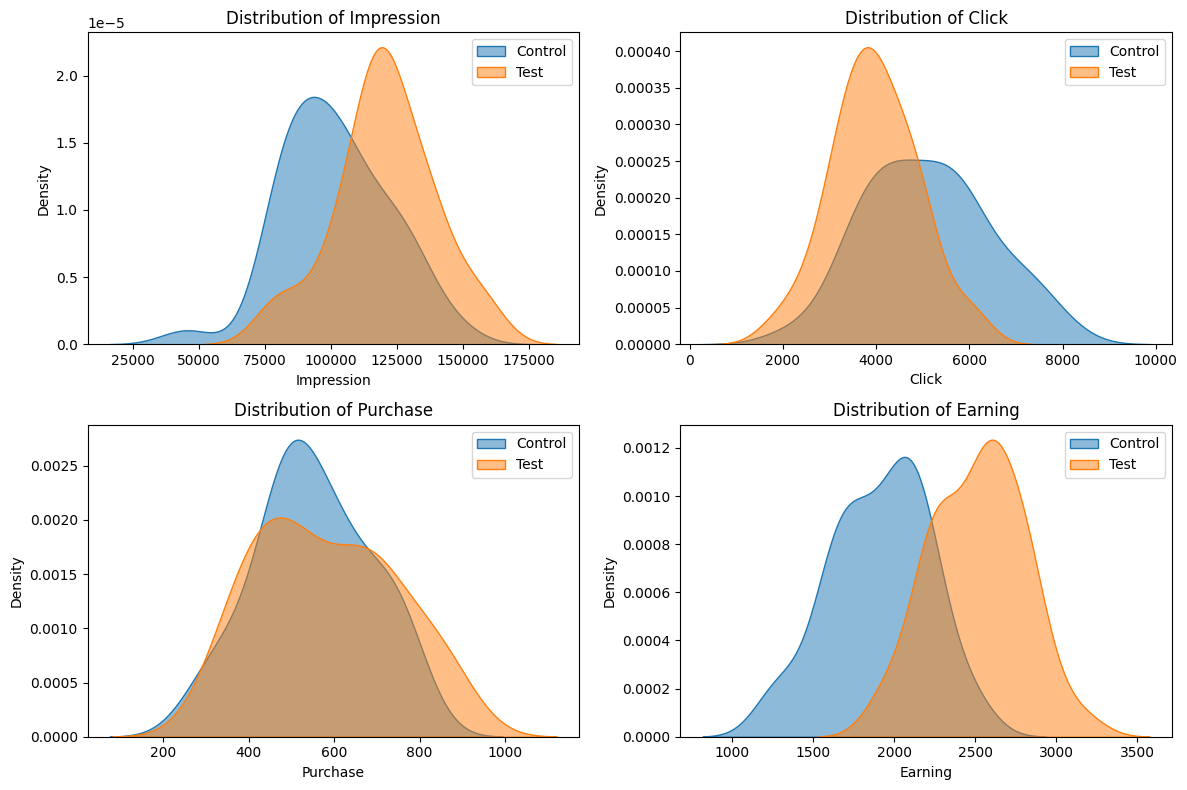

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define the column names
columns = ['Impression', 'Click', 'Purchase', 'Earning']

# Loop through the columns and create distribution plots for each
for i, col in enumerate(columns):
    row = i // 2  # Determine the row index
    col_idx = i % 2  # Determine the column index

    # Plot the distribution for control group
    sns.kdeplot(control_df[col], ax=axes[row, col_idx], label='Control', fill=True, alpha=0.5)

    # Plot the distribution for test group
    sns.kdeplot(test_df[col], ax=axes[row, col_idx], label='Test', fill=True, alpha=0.5)  # Overlay the test data


    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Density')
    axes[row, col_idx].legend()


# Adjust layout and display the plot
plt.tight_layout()
plt.show()


<ipython-input-4-98e714d91058>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


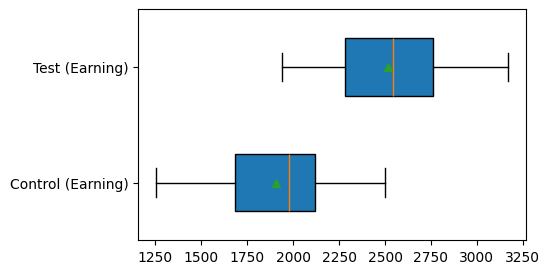

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

ax.boxplot(
    x=[control_df['Earning'], test_df['Earning']],
    vert=False,
    patch_artist=True,
    widths=0.5,
    sym='r|',
    labels=['Control (Earning)','Test (Earning)'],
    showmeans=True,
    showfliers=True
)

plt.show()

In [5]:
import pandas as pd
from scipy.stats import levene
from scipy.stats import ttest_ind

mean_control = control_df['Earning'].mean()
mean_test = test_df['Earning'].mean()

print("mean_control=", mean_control)
print("mean_test=",mean_test)

# Perform two-sample t-test for each level of 'pathsize_cat'
groupC = control_df['Earning']
groupT = test_df['Earning']

# Perform Levene's test for homogeneity of variances
statistic, p_value_L = levene(groupC, groupT)

if  p_value_L > 0.05:

    t_statistic, p_value = ttest_ind(groupC, groupT,alternative="less" ,equal_var=True)

    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

else:

    t_statistic, p_value = ttest_ind(groupC, groupT,alternative="less", equal_var=False)

    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

mean_control= 1908.575
mean_test= 2514.925
t-statistic: -9.256092651165002
p-value: 1.720180077421263e-14
Reject the null hypothesis: There is a significant difference between the means.
